# BTC-Predict: Bitcoin Price Prediction

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 7.4 MB/s 


In [2]:
import pyupbit

In [3]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-08-25 02:00:00,340.0,345.0,339.0,341.0,6.840066e+07,2.344565e+10
2021-08-25 03:00:00,341.0,344.0,340.0,344.0,3.041157e+07,1.038767e+10
2021-08-25 04:00:00,344.0,349.0,342.0,348.0,2.624880e+07,9.071819e+09
2021-08-25 05:00:00,348.0,351.0,346.0,351.0,1.849547e+07,6.463768e+09
2021-08-25 06:00:00,351.0,352.0,345.0,345.0,2.391387e+07,8.322139e+09
...,...,...,...,...,...,...
2021-09-02 05:00:00,333.0,336.0,333.0,334.0,9.355183e+06,3.128548e+09
2021-09-02 06:00:00,334.0,337.0,333.0,336.0,1.479516e+07,4.957128e+09
2021-09-02 07:00:00,337.0,340.0,335.0,337.0,4.352556e+07,1.470055e+10
2021-09-02 08:00:00,338.0,341.0,337.0,340.0,4.607618e+07,1.562566e+10


In [4]:
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-08-25 02:00:00,341.0
1,2021-08-25 03:00:00,344.0
2,2021-08-25 04:00:00,348.0
3,2021-08-25 05:00:00,351.0
4,2021-08-25 06:00:00,345.0
...,...,...
195,2021-09-02 05:00:00,334.0
196,2021-09-02 06:00:00,336.0
197,2021-09-02 07:00:00,337.0
198,2021-09-02 08:00:00,340.0


In [5]:
from fbprophet import Prophet

In [6]:
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [7]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

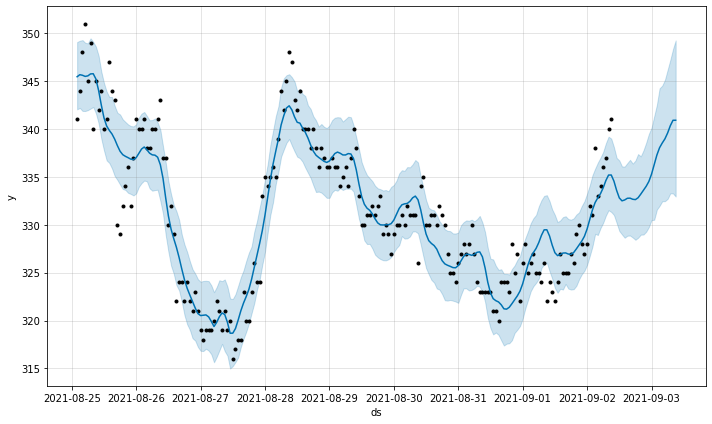

In [8]:
fig = model.plot(forecast)